In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

In [ ]:
!git reset --hard 064365d8683fd002e9ad789c1e91fa3d021b44f0

YOLOv5  v7.0-72-g064365d8 Python-3.12.2 torch-2.2.2+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
image 1/1: 1080x1920 2 memorys
Speed: 104.3ms pre-process, 610.4ms inference, 57.6ms NMS per image at shape (1, 3, 384, 640)


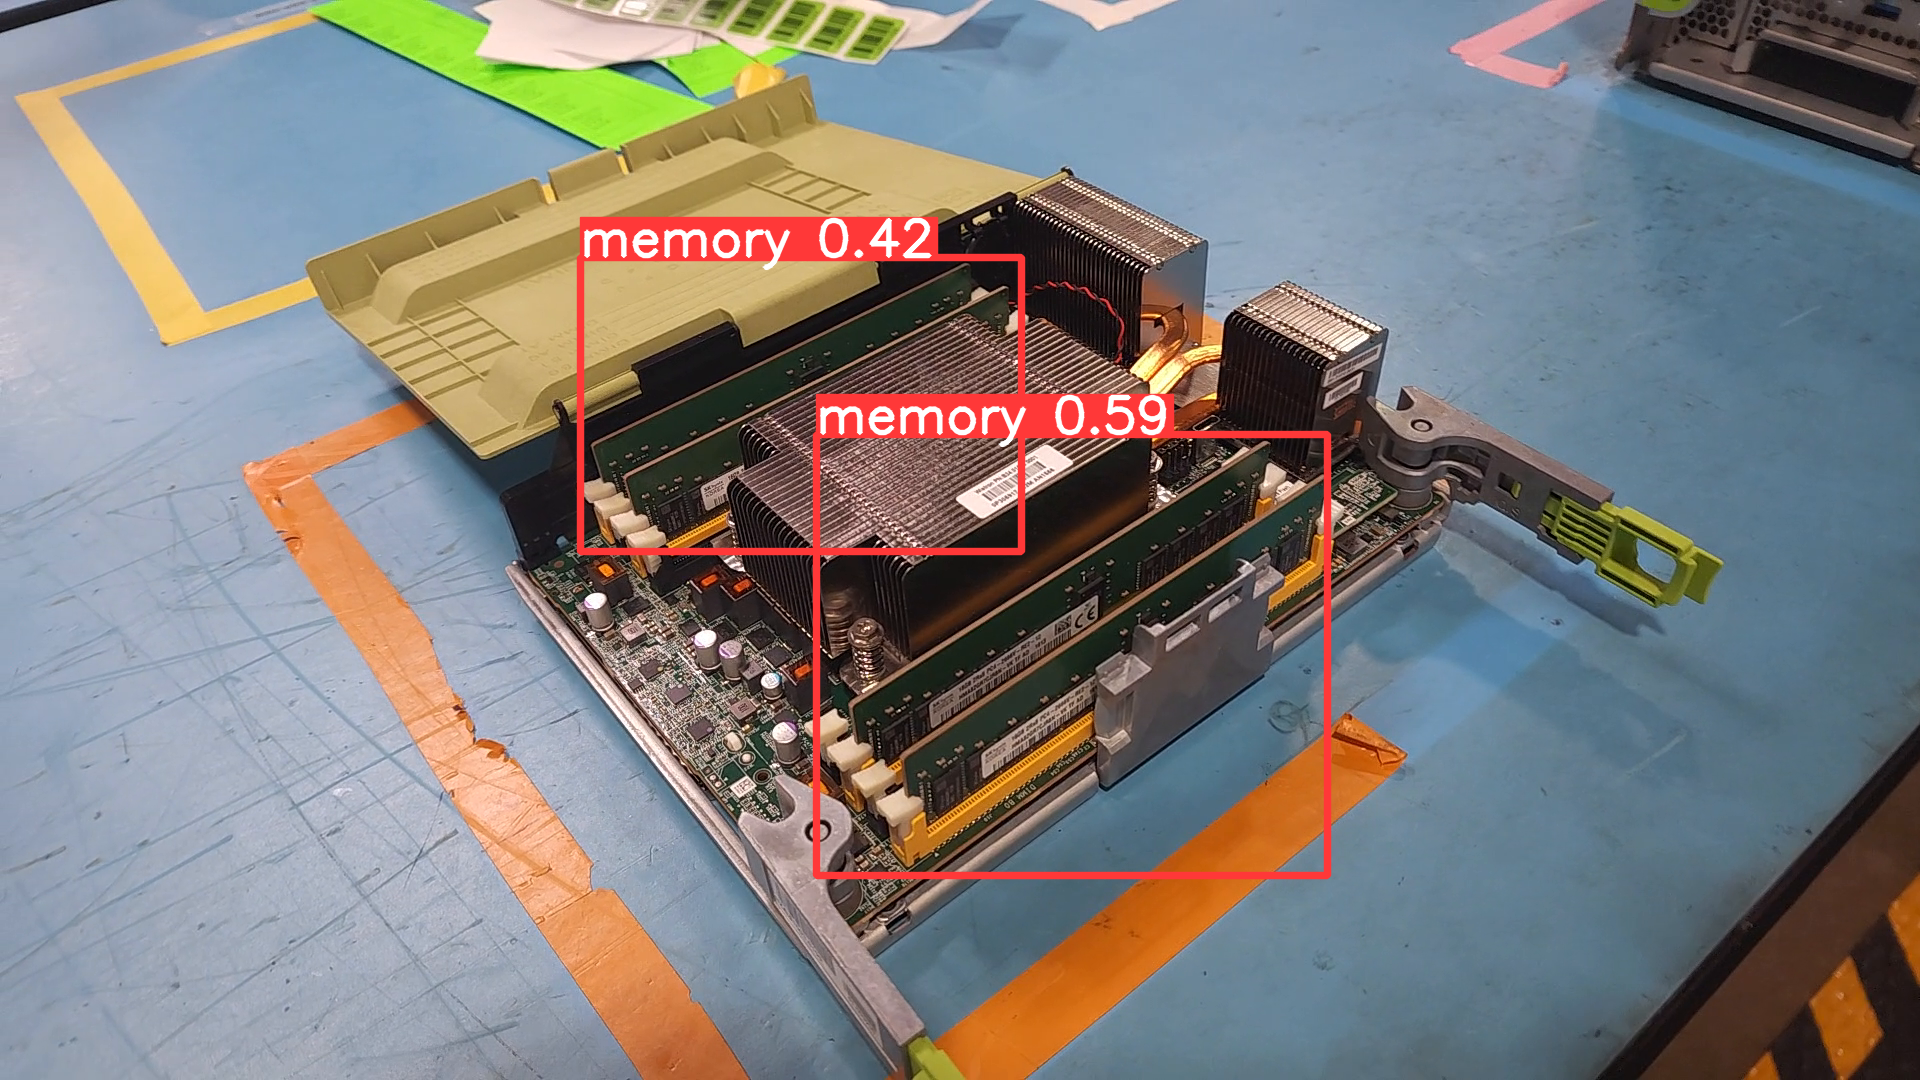

In [19]:
import torch
from pathlib import Path

model_path = Path(r'C:\Users\Admin\Desktop\ds_internship\day_4\best.pt')

model = torch.hub.load(str(Path(r'C:\Users\Admin\Desktop\ds_internship\day_4\yolov5')), 'custom', path=model_path, source='local')

img = Path(r"C:\Users\Admin\Desktop\new_internship\ds_internship\day_four\training\memory\out15.png")


results = model(img)

# Results
results.print()
results.show()  

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


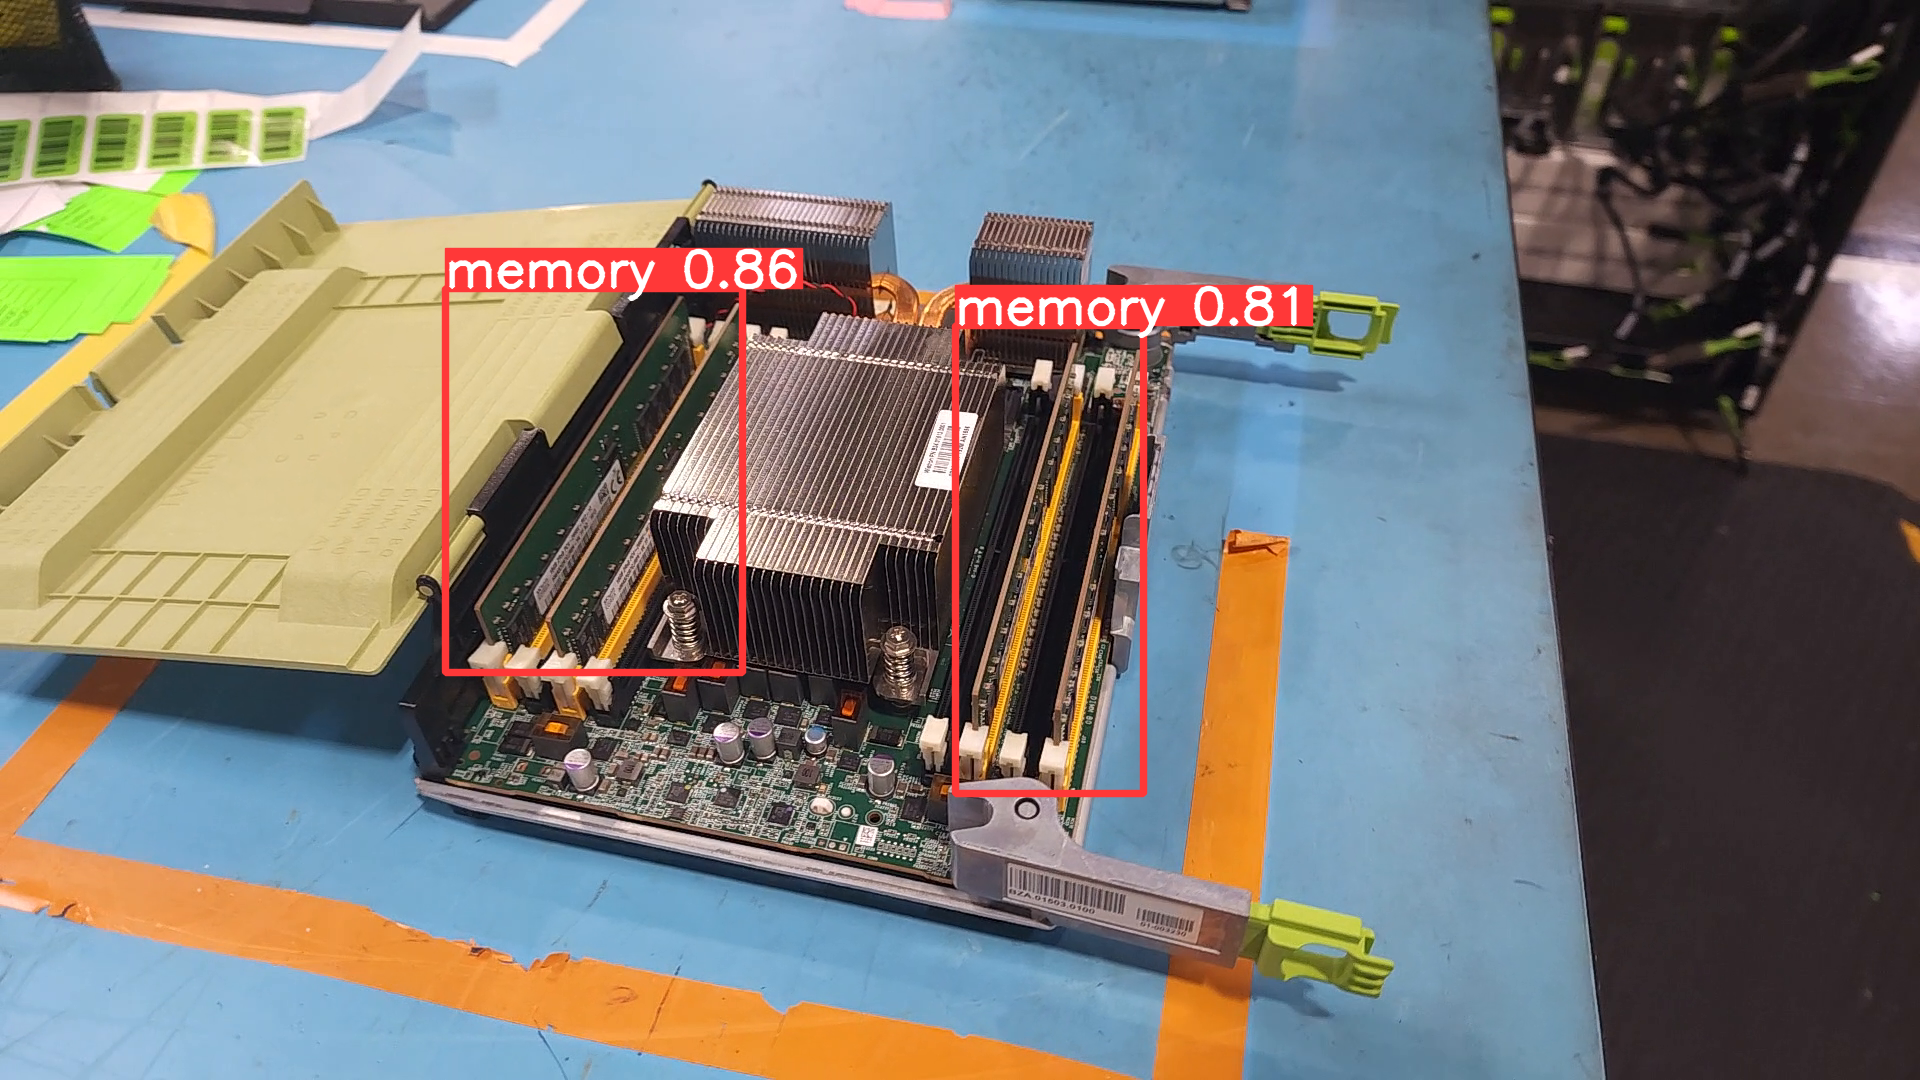

127.0.0.1 - - [08/Apr/2024 16:32:01] "POST /predict HTTP/1.1" 200 -


In [33]:
import cv2
import matplotlib.pyplot as plt
import os

from flask import Flask, request, jsonify

app = Flask(__name__)

UPLOAD_FOLDER = './uploads'
if not os.path.exists(UPLOAD_FOLDER):
    os.makedirs(UPLOAD_FOLDER)

app.config['UPLOAD_FOLDER'] = UPLOAD_FOLDER

@app.route('/predict', methods=['POST'])
def predict():
    if 'image' not in request.files:
        return jsonify({'error': 'No image uploaded'}), 400
    
    image_file = request.files['image']

    image = cv2.imread(image_file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

    
    
    results = model(image)
    results.show()  

    return jsonify({'predictions': 'success'})

if __name__ == '__main__':
    app.run()
